In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#Local Search
Implementation

In [ ]:
def local_search(f, x_prime, step, max_iterations):
  # un point x appartient a Omega
  x = x_prime
  fx = f(x)
  for i in range(max_iterations):
    # déterminer les positions voisines
    x_left = x - step
    x_right = x + step
    # évaluer la fonction en ces positions
    f_left = f(x_left)
    f_right = f(x_right)

    # si la fonction en x_left est plus petite que celle en x, mettre à jour x et fx
    if f_left < fx:
      x = x_left
      fx = f_left

    # si la fonction en x_right est plus petite que celle en x, mettre à jour x et fx
    elif f_right < fx:
      x = x_right
      fx = f_right

    # sinon, la fonction a atteint un point minimum local
    else:
      break
  return x, fx

Test

Le point minimum local est x = 1.2 avec une valeur de f(x) = 1.997479556705148


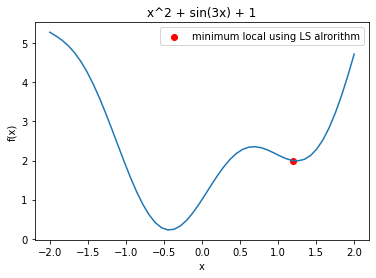

In [ ]:
def f(x):
    return x**2 + np.sin(3*x) + 1
    
x_prime = 1.7
step = 0.5
max_iterations = 1000

minimum_x, minimum_fx = local_search(f, x_prime, step, max_iterations)

print("Le point minimum local est x =", minimum_x, "avec une valeur de f(x) =", minimum_fx)

x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = f(x)  # calculate y values for plotting
plt.plot(x, y)
plt.scatter(minimum_x, minimum_fx, color='red', label='minimum local using LS alrorithm')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x^2 + sin(3x) + 1')
plt.legend()
plt.show()

#Simulated Annealing
implementation

In [ ]:
def simulated_annealing(f, x_init, T_init, alpha, T_min, max_iter):
    x_current = x_init
    T = T_init
    r = random.uniform(0, 1)
    best_x = x_current
    best_f = f(x_current)
    for i in range(max_iter):
        x_new = random.uniform(-10, 10)  # Generate new solution
        delta_f = f(x_new) - f(x_current)
        if delta_f < 0: # if new solution is better, accept it
            x_current = x_new
            if f(x_new) < best_f:
                best_f = f(x_new)
                best_x = x_new
        else:
            p = math.exp(-delta_f/T)
            if r < p: # accept worse solution with probability p
                x_current = x_new
        T = T*alpha
        if T < T_min:
            T = T_min
    return best_x, best_f

Test

-0.42659376098767154 0.22402910903936146


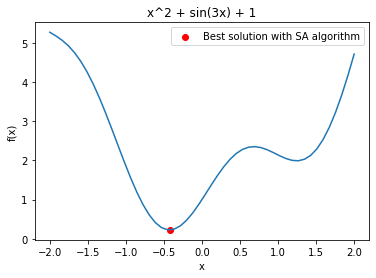

In [ ]:
# Example usage:
def f(x):
    return x**2 + np.sin(3*x) + 1

x_init = 3
T_init = 100
alpha = 0.95
T_min = 1e-6
max_iter = 10000

best_x, best_f = simulated_annealing(f, x_init, T_init, alpha, T_min, max_iter)
print(best_x, best_f)

x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = f(x)  # calculate y values for plotting

plt.plot(x, y)
plt.scatter(best_x, best_f, color='red', label='Best solution with SA algorithm')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x^2 + sin(3x) + 1')
plt.legend()
plt.show()

#VNS Search 
Implemenatation

In [ ]:
def vns(f, x0, neighborhoods, max_iterations=100):
    x = x0
    best_x = x0
    best_f = f(x0)
    xs = [x0]  # list to store all solutions
    for i in range(max_iterations):
        for neighborhood in neighborhoods:
            x_new = neighborhood(x)
            f_new = f(x_new)
            if f_new < best_f:
                best_f = f_new
                best_x = x_new
                x = x_new
                xs.append(x)  # store new solution
    return best_x, f(best_x), xs

Test

-0.4213297994834504 0.22421601246970557


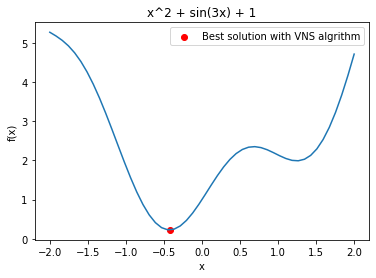

In [ ]:
def f(x):
    return x**2 + np.sin(3*x) + 1

def random_neighborhood(x):
    return x + random.uniform(-1, 1)

x0 = 0
neighborhoods = [random_neighborhood]
min_x, min_f,xs = vns(f, x0, neighborhoods)
print(min_x, min_f)

x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = f(x)  # calculate y values for plotting

plt.plot(x, y)
plt.scatter(min_x, min_f, color='red', label='Best solution with VNS algrithm')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x^2 + sin(3x) + 1')
plt.legend()
plt.show()

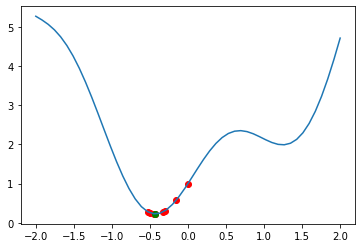

In [ ]:
min_x, min_f, xs = vns(f, x0, neighborhoods)

# Plot function and solutions
x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = [f(xx) for xx in x]
plt.plot(x, y)
plt.scatter([x for x in xs], [f(x) for x in xs], color='r')
plt.scatter(min_x, min_f, color='green', label='Best solution with VNS algrithm')
plt.show()

#Tabo Search
Implementation

best x is :  -0.3584166482814073


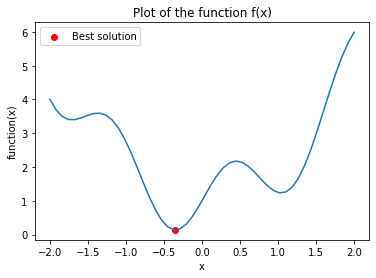

In [ ]:
def tabu_search(obj_func, tabu_list_length, max_iterations):
    # Initialize the best solution to a random value within the search space
    best_solution = random.uniform(-10, 10)
    best_obj_value = obj_func(best_solution)
    
    # Initialize the tabu list
    tabu_list = []
    
    for i in range(max_iterations):
        # Generate a random neighbor
        candidate_solution = random.uniform(-10, 10)
        
        # Check if the candidate solution is in the tabu list
        if candidate_solution in tabu_list:
            continue
        
        candidate_obj_value = obj_func(candidate_solution)
        
        # Update the best solution if the candidate solution is better
        if candidate_obj_value < best_obj_value:
            best_solution = candidate_solution
            best_obj_value = candidate_obj_value
            
        # Add the candidate solution to the tabu list
        tabu_list.append(candidate_solution)
        
        # If the tabu list is full, remove the oldest solution
        if len(tabu_list) > tabu_list_length:
            tabu_list.pop(0)
    
    return best_solution


def objective_function(x):
    return x**2 + np.sin(4*x) + 1
best_x=tabu_search(objective_function, 5, 1000)
print("best x is : ",best_x)


x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = objective_function(x)  # calculate y values for plotting

plt.plot(x, y)
plt.scatter(best_x, objective_function(best_x), color='red', label='Best solution')
plt.xlabel('x')
plt.ylabel('function(x)')
plt.title('Plot of the function f(x)')
plt.legend()
plt.show()



#Guided Local Search
Implementation

In [ ]:
def guided_local_search(function):
    max_iterations=1000
    neighborhood_size=10
    perturbation_size=0.1
    current_solution = random.uniform(-10, 10)
    best_solution = current_solution
    for i in range(max_iterations):
        neighborhood = [current_solution + random.uniform(-perturbation_size, perturbation_size) 
                        for _ in range(neighborhood_size)]
        best_neighbor = min(neighborhood, key=function)
        if function(best_neighbor) < function(best_solution):
            best_solution = best_neighbor
        if function(best_neighbor) < function(current_solution):
            current_solution = best_neighbor
    return best_solution

def main():
    def function(x):
        return x**2 + np.sin(3*x) + 1

    best_x = guided_local_search(function)
    print("Optimal solution: x = ",best_x)
    print("Optimal value: f(x) = ",function(best_x))

    x = np.linspace(-2, 2, 50)  # generate x values for plotting
    y = function(x)  # calculate y values for plotting

    plt.plot(x, y)
    plt.scatter(best_x, function(best_x), color='red', label='Best solution')
    plt.xlabel('x')
    plt.ylabel('function(x)')
    plt.title('Plot of the function f(x)')
    plt.legend()
    plt.show()


#Gradient Descent
Implementation

Minimum found at -0.2908393149953235


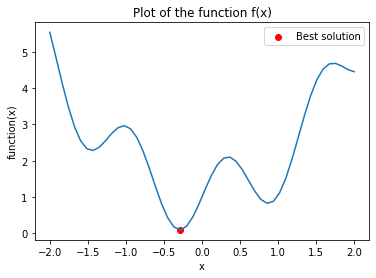

In [ ]:
def Loss(x):
    return x**2 + np.sin(5*x) + 1

def function(x):
    return 2*x + 5*np.cos(5*x)

def gradient_descent(x_init, learning_rate=0.01, num_iterations=100):
    x_current = x_init
    for i in range(num_iterations):
        x_current = x_current - learning_rate * function(x_current)
    return x_current

x_min = gradient_descent(-1, num_iterations=1000)
print("Minimum found at", x_min)

x = np.linspace(-2, 2, 50)  # generate x values for plotting
y = Loss(x)  # calculate y values for plotting

plt.plot(x, y)
plt.scatter(x_min, Loss(x_min), color='red', label='Best solution')
plt.xlabel('x')
plt.ylabel('function(x)')
plt.title('Plot of the function f(x)')
plt.legend()
plt.show()
